<a href="https://colab.research.google.com/github/Aldistwn29/Matakuliah_Data_Science/blob/main/praktikum_data_exploratori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deskripsi Kasus:**
Seorang data analis dan data scientist ingin memahami pola penjualan di sepatu adidas. Mereka ingin mengetahui produk mana yang paling laris, toko mana yang memiliki penjualan tertinggi,distribusi rata-rata penjualan per unit. waktu terbaik untuk menjual, dan rata-rata tren penjualan bulanan.

# Library

In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [372]:
# from google.colab import drive
# drive.mount('/content/drive')

# Data Understanding

In [373]:
df = pd.read_excel('/content/Adidas US Sales Datasets.xlsx')


df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [374]:
# Dimensi data
df.shape

(9652, 14)

In [375]:
# Menghapus kolom Unnamed
df = df.drop('Unnamed: 0', axis=1)

In [376]:
df = df.drop(labels=[0,1,2], axis=0)

In [377]:
df.columns = df.iloc[0]

In [378]:
df = df.drop(labels=3, axis=0)

In [379]:
df = df.reset_index(drop=True)

In [380]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [381]:
duplicated = df.duplicated().sum().sum()
print(f"duplikat:{duplicated:.1%}")

duplikat:0.0%


In [382]:
missing_value = df.isnull().sum().sum()
print(f"missing_value:{missing_value:.1%}")

missing_value:0.0%


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [384]:
df.describe()

<ipython-input-384-ea8415b8a3ee>:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df.describe()


3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648.00,9648
unique,6,4,724,5,50,52,6,146,361,3512,6510,127.00,3
top,Foot Locker,1185732,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50,225,100000,21000,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557,207,52,34,1229.00,4889


# Exploratory data analysis

In [385]:
# Menambah kolom
# df['Total Sales'] = df['Price per Unit'] * df['Units Sold']

In [386]:
# Mengubah type data ke date
df['date'] = pd.to_datetime(df['Invoice Date'])
# Menambahkan kolom baru dengan nama bulan
df['month'] = df['date'].dt.month

Produk terlaris:
Product
Men's Street Footwear        593320
Men's Athletic Footwear      435526
Women's Apparel              433827
Women's Street Footwear      392269
Women's Athletic Footwear    317236
Men's Apparel                306683
Name: Units Sold, dtype: object


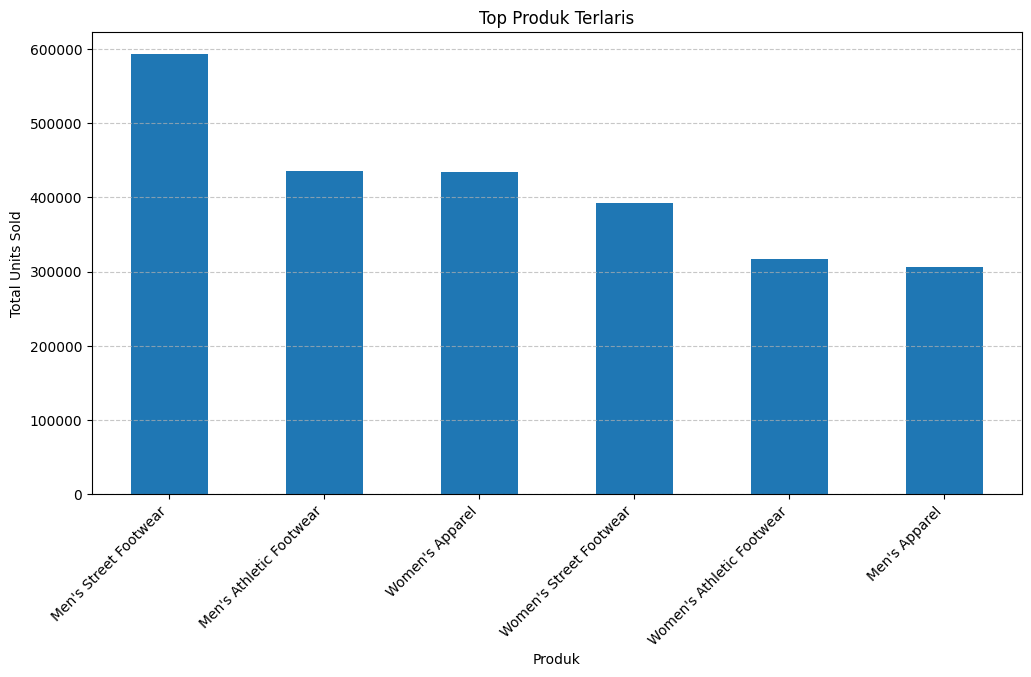

In [387]:
# Menampilkan Top produk terlaris
top_products = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
print(f"Produk terlaris:\n{top_products}")

# Menampilkan Top produk terlaris
top_products = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

# Membuat plot
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top Produk Terlaris')
plt.xlabel('Produk')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')  # Memutar label produk agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Toko dengan penjualan tertinggi:
Retailer
West Gear        242964333.0
Foot Locker      220094720.0
Sports Direct    182470997.0
Kohl's           102114753.0
Amazon            77698912.0
Walmart           74558410.0
Name: Total Sales, dtype: object


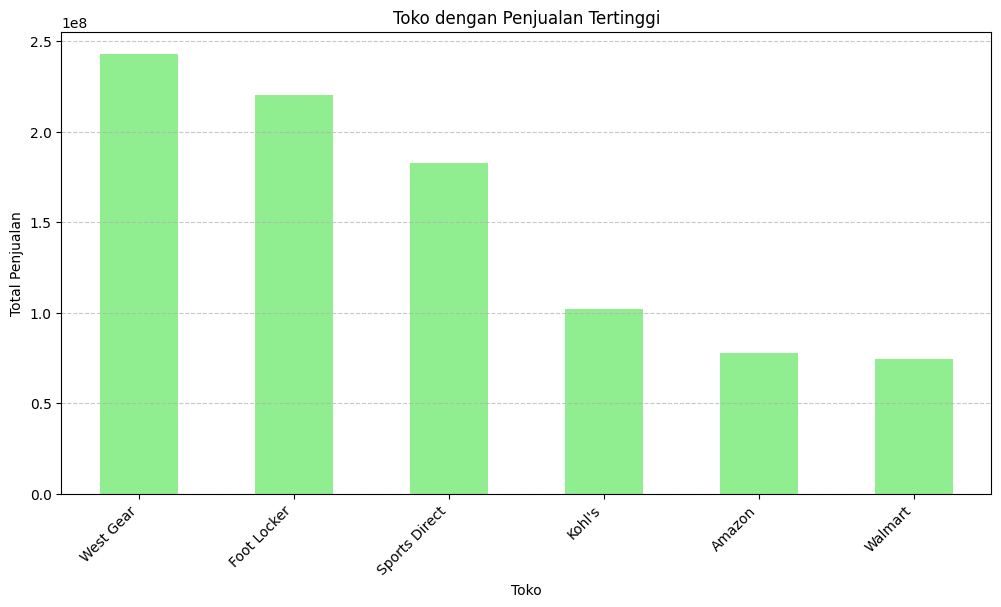

In [388]:
# Menghitung Total Sales untuk setiap toko
top_retailer = df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)
print(f"Toko dengan penjualan tertinggi:\n{top_retailer}")

# Menghitung Total Sales untuk setiap toko
top_retailer = df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)

# Membuat plot
plt.figure(figsize=(12, 6))
top_retailer.plot(kind='bar', color='lightgreen')
plt.title('Toko dengan Penjualan Tertinggi')
plt.xlabel('Toko')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')  # Memutar label toko agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Distribusi rata-rata penjualan per unit:
Product
Men's Apparel                190.960772
Men's Athletic Footwear      270.513043
Men's Street Footwear        368.521739
Women's Apparel               269.79291
Women's Athletic Footwear    197.531756
Women's Street Footwear      243.948383
Name: Units Sold, dtype: object


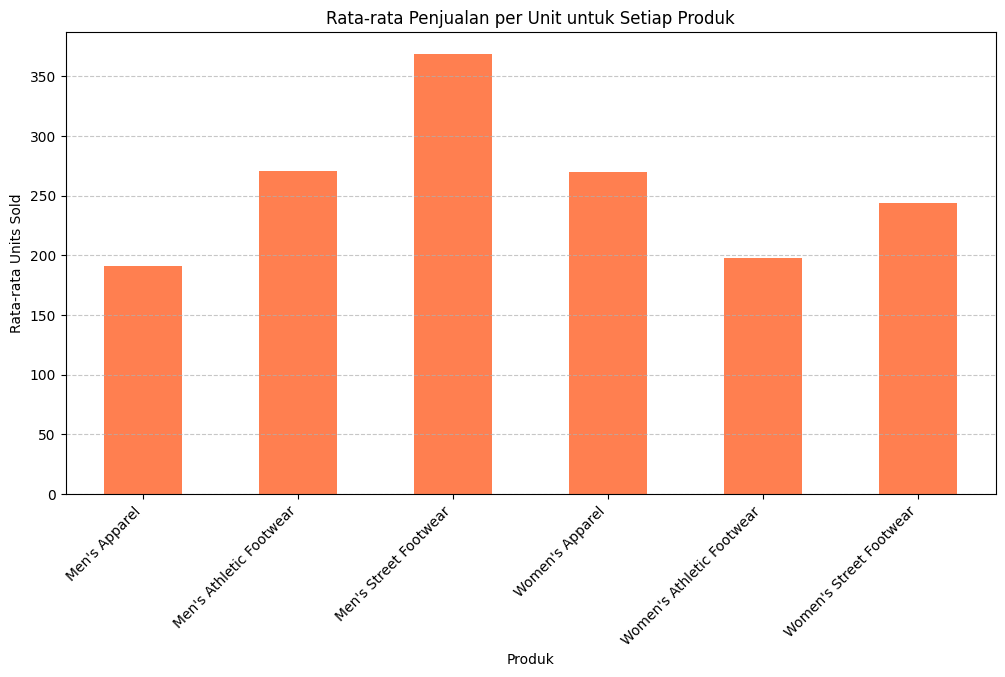

In [389]:
# Menghitung rata-rata penjualan per unit untuk setiap produk
average_sales_per_unit = df.groupby('Product')['Units Sold'].mean()
print(f"Distribusi rata-rata penjualan per unit:\n{average_sales_per_unit}")

# Menghitung rata-rata penjualan per unit untuk setiap produk
average_sales_per_unit = df.groupby('Product')['Units Sold'].mean()

# Membuat plot
plt.figure(figsize=(12, 6))
average_sales_per_unit.plot(kind='bar', color='coral')
plt.title('Rata-rata Penjualan per Unit untuk Setiap Produk')
plt.xlabel('Produk')
plt.ylabel('Rata-rata Units Sold')
plt.xticks(rotation=45, ha='right')  # Memutar label produk agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [390]:
top_retails = df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)
print(f"total_penjualan_retail:\n{top_retails}")

total_penjualan_retail:
Retailer
West Gear        242964333.0
Foot Locker      220094720.0
Sports Direct    182470997.0
Kohl's           102114753.0
Amazon            77698912.0
Walmart           74558410.0
Name: Total Sales, dtype: object


<ipython-input-391-e12c366cbc02>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  top_retails.plot(kind='pie', subplots=True, figsize=(12,7), title='Total Sales Per Retailer', legend=True, autopct='%1.0f%%')


array([<Axes: ylabel='Total Sales'>], dtype=object)

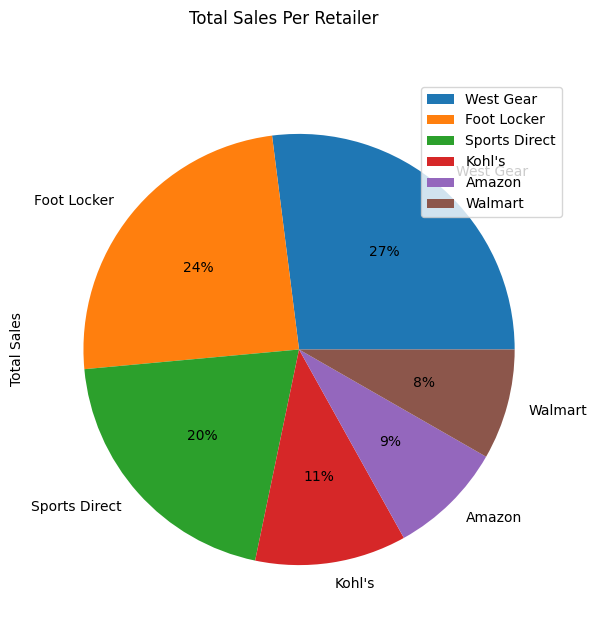

In [391]:
# Visulisasi pie chart
top_retails.plot(kind='pie', subplots=True, figsize=(12,7), title='Total Sales Per Retailer', legend=True, autopct='%1.0f%%')

In [392]:
# Penjualan sales permethod
top_sales_method = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False)
print(f"Penjualan per method:\n{top_sales_method}")

Penjualan per method:
Sales Method
In-store    356643750.0
Outlet      295585493.0
Online      247672882.0
Name: Total Sales, dtype: object


<Axes: title={'center': 'Penjualan Per Method'}, ylabel='Sales Method'>

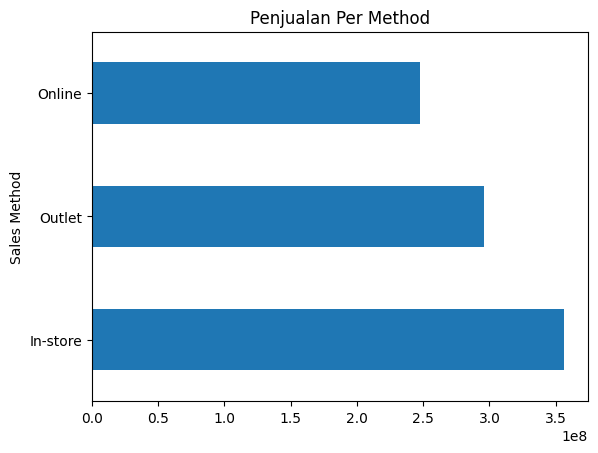

In [393]:
# Visualisasi sales per method
top_sales_method.plot(kind='barh', title='Penjualan Per Method')

Penjualan bulanan:
month
1     71479142.0
2     61100153.0
3     56809109.0
4     72339970.0
5     80507695.0
6     74747372.0
7     95480694.0
8     92166201.0
9     77661459.0
10    63911033.0
11    67857340.0
12    85841957.0
Name: Total Sales, dtype: object


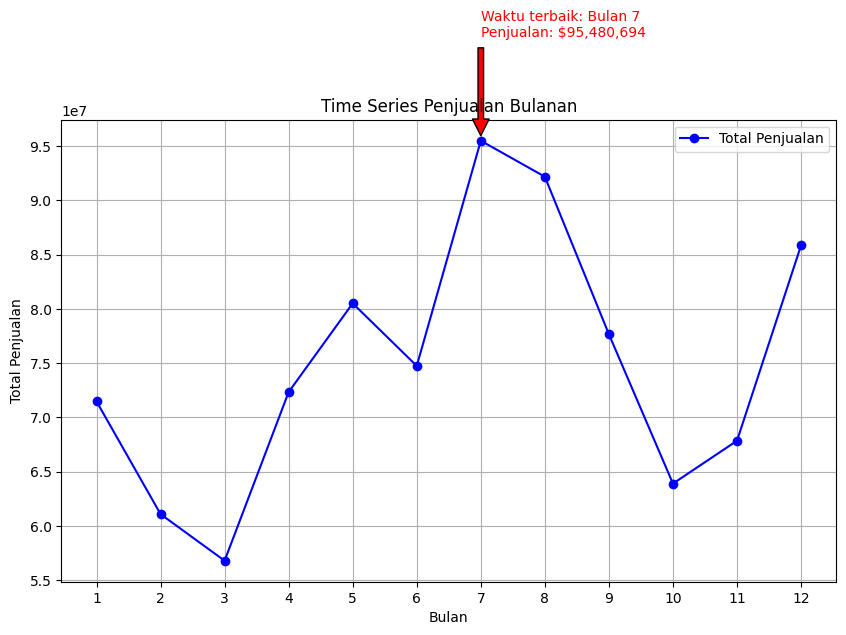

In [394]:
# Menghitung penjualan bulanan
monthly_sales = df.groupby('month')['Total Sales'].sum()
best_month = monthly_sales.idxmax()  # Mendapatkan bulan dengan penjualan tertinggi
best_month_sales = monthly_sales.max()  # Penjualan tertinggi

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b', label='Total Penjualan')
plt.title('Time Series Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(monthly_sales.index)
plt.grid(True)

# Menambahkan anotasi pada bulan dengan penjualan tertinggi
plt.annotate(f'Waktu terbaik: Bulan {best_month}\nPenjualan: ${best_month_sales:,.0f}',
             xy=(best_month, best_month_sales),
             xytext=(best_month, best_month_sales + best_month_sales * 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red')

print(f"Penjualan bulanan:\n{monthly_sales}")
plt.legend()
plt.show()

In [395]:
best_month

7

In [396]:
best_month_sales

95480694.0

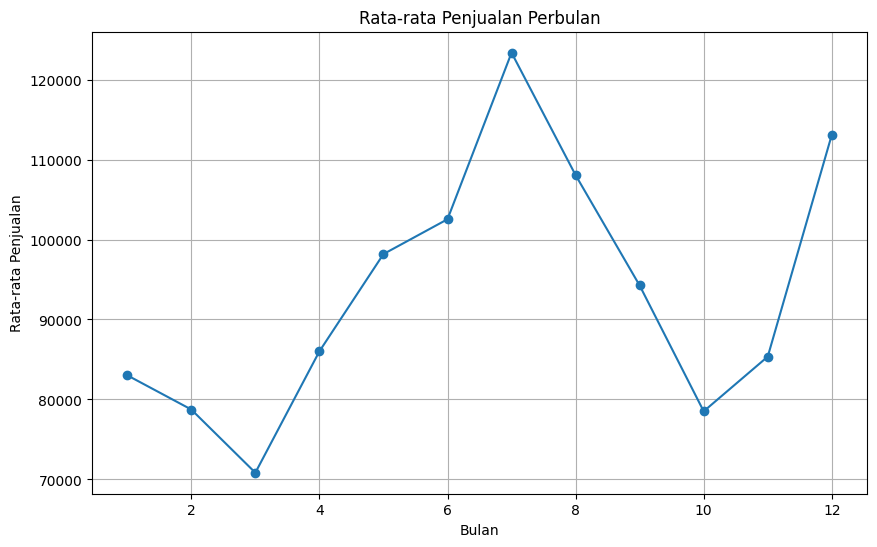

In [397]:
# Time series rata-rata penjualan Bulan
avg_monthly_sales = df.groupby('month')['Total Sales'].mean()
# print(f"Rata-rata penjualan bulanan:\n{avg_monthly_sales}")

# visuliasasi
plt.figure(figsize=(10,6))
plt.plot(avg_monthly_sales.index, avg_monthly_sales.values, marker='o')
plt.title("Rata-rata Penjualan Perbulan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penjualan")
plt.grid()
plt.show()

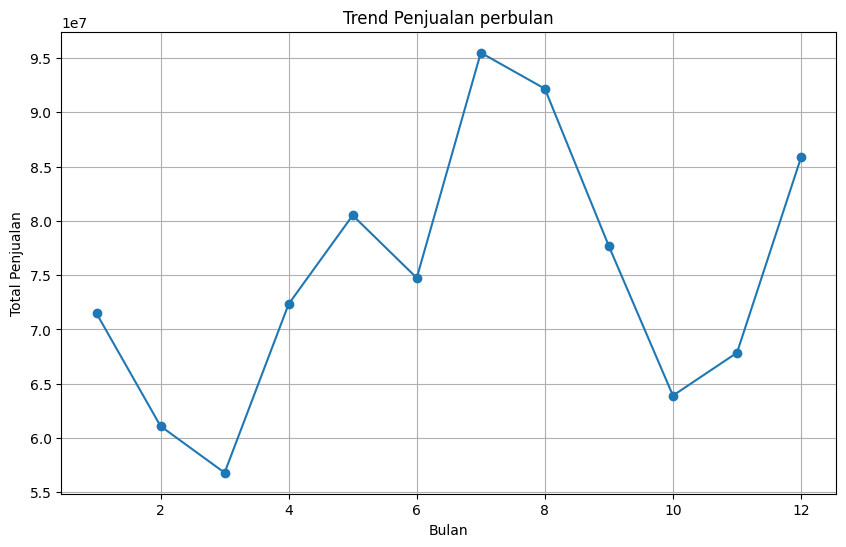

In [398]:
# Visualisasi
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Trend Penjualan perbulan")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan")
plt.grid()
plt.show()

# Modeling

In [399]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [400]:
df2 = df.copy()

In [401]:
# Mengconversi kategori ke numerik
df2['Region'] = pd.factorize(df2.Region)[0]
df2['State'] = pd.factorize(df2.State)[0]
df2['City'] = pd.factorize(df2.City)[0]
df2['Retailer'] = pd.factorize(df2.Retailer)[0]
df2['Product'] = pd.factorize(df2.Product)[0]

In [402]:
df2.rename(columns={'Sales Method':'Method'}, inplace=True)

In [403]:
df2['Method'] = pd.factorize(df2.Method)[0]

In [404]:
# Menghapus kolom
df2 = df2.drop(['Invoice Date', 'Retailer ID'], axis=1)

In [405]:
df2 = df2.drop(['date', 'month'], axis=1)

In [406]:
df2['Units Sold'] = df2['Units Sold'].astype(int)
df2['Total Sales'] = df2['Total Sales'].astype(int)
df2['Operating Profit'] = df2['Operating Profit'].astype(int)
df2['Retailer'] = df2['Retailer'].astype(int)

In [407]:
df2.head()

3,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Method
0,0,0,0,0,0,50,1200,600000,300000,0.5,0
1,0,0,0,0,1,50,1000,500000,150000,0.3,0
2,0,0,0,0,2,40,1000,400000,140000,0.35,0
3,0,0,0,0,3,45,850,382500,133875,0.35,0
4,0,0,0,0,4,60,900,540000,162000,0.3,0


In [408]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   int64 
 1   Region            9648 non-null   int64 
 2   State             9648 non-null   int64 
 3   City              9648 non-null   int64 
 4   Product           9648 non-null   int64 
 5   Price per Unit    9648 non-null   object
 6   Units Sold        9648 non-null   int64 
 7   Total Sales       9648 non-null   int64 
 8   Operating Profit  9648 non-null   int64 
 9   Operating Margin  9648 non-null   object
 10  Method            9648 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 829.2+ KB


In [409]:
corr = df2.corr()
corr

3,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Method
3,,,,,,,,,,,
Retailer,1.000000,-0.097952,0.096816,0.096194,0.002262,0.057918,0.007130,0.016339,0.012788,0.001682,-0.005612
Region,-0.097952,1.000000,-0.209003,-0.176060,-0.000121,0.042493,0.095324,0.079305,0.072539,-0.002096,0.130336
State,0.096816,-0.209003,1.000000,0.976045,0.000367,-0.147839,-0.251792,-0.158281,-0.145209,-0.019765,-0.013363
City,0.096194,-0.176060,0.976045,1.000000,0.000393,-0.143264,-0.244089,-0.151011,-0.137264,-0.023920,-0.011398
Product,0.002262,-0.000121,0.000367,0.000393,1.000000,0.190119,-0.177418,-0.055138,-0.054475,0.010860,-0.000524
Price per Unit,0.057918,0.042493,-0.147839,-0.143264,0.190119,1.000000,0.265869,0.435811,0.394546,-0.137486,-0.026885
Units Sold,0.007130,0.095324,-0.251792,-0.244089,-0.177418,0.265869,1.000000,0.913431,0.892380,-0.305479,-0.355552
Total Sales,0.016339,0.079305,-0.158281,-0.151011,-0.055138,0.435811,0.913431,1.000000,0.956308,-0.364591,-0.386012
Operating Profit,0.012788,0.072539,-0.145209,-0.137264,-0.054475,0.394546,0.892380,0.956308,1.000000,-0.211921,-0.350035


<Axes: xlabel='3', ylabel='3'>

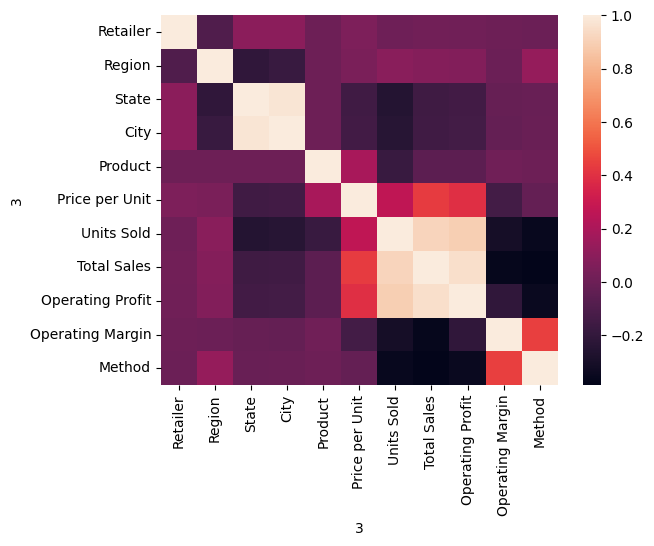

In [410]:
sns.heatmap(df2.corr())

In [411]:
# Sales Prediction using multiple Linear Regression
X = df2.values[:,(0,1,2,3,4,5,6,8,9,10)]
y = df2.values[:, 7]

In [412]:
X.shape

(9648, 10)

In [413]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

In [414]:
lr = LinearRegression()

In [415]:
# Training model
lr.fit(X_train, y_train)

LinearRegression()

In [416]:
y_pred = lr.predict(X_test)

In [417]:
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

R2 Score:  0.9587616577225724


In [418]:
# sekarang prediksi total sales
df2['sales_pred'] = lr.predict(X)

In [419]:
df2.head()

3,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Method,sales_pred
0,0,0,0,0,0,50,1200,600000,300000,0.5,0,702908.696052
1,0,0,0,0,1,50,1000,500000,150000,0.3,0,450185.790083
2,0,0,0,0,2,40,1000,400000,140000,0.35,0,416059.917334
3,0,0,0,0,3,45,850,382500,133875,0.35,0,383273.192972
4,0,0,0,0,4,60,900,540000,162000,0.3,0,463924.150188


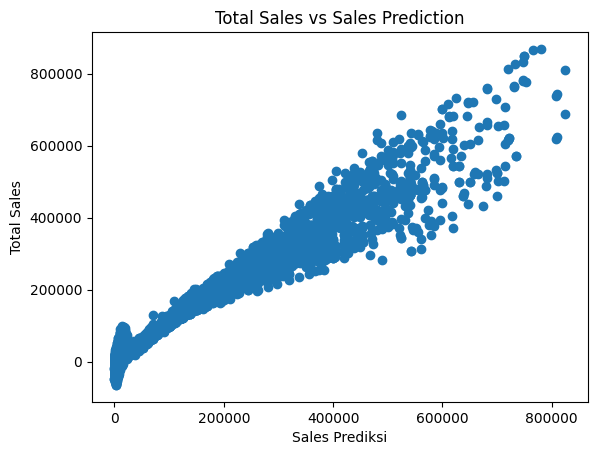

In [420]:
plt.scatter(df2['Total Sales'], df2['sales_pred'])
plt.xlabel('Sales Prediksi')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Sales Prediction')
plt.show()

In [421]:
# # Import library yang dibutuhkan
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Preprocessing data (menyesuaikan dengan dataset yang digunakan)
# X = df[['Price per Unit', 'Units Sold', 'Operating Profit']]
# y = df['Total Sales']  # Ganti dengan kolom target yang sesuai

# # Bagi data menjadi train dan test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Inisialisasi model Linear Regression
# model = LinearRegression()

# # Melatih model
# model.fit(X_train, y_train)

# # Prediksi pada test set
# y_pred = model.predict(X_test)

# # Evaluasi model
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# # Menampilkan hasil evaluasi
# print("Hasil Evaluasi Linear Regression:")
# print(f"MAE: {mae}")
# print(f"MSE: {mse}")
# print(f"RMSE: {rmse}")
# print(f"R2 Score: {r2}")

# # Visualisasi hasil prediksi vs aktual
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="b")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Linear Regression - Actual vs Predicted')
# plt.show()

# print("""
# Model Linear Regression yang digunakan untuk memprediksi Total Sales menunjukkan performa yang sangat baik
# dengan R2 Score sebesar 0.958, yang berarti model mampu menjelaskan sekitar 95.8% variasi data.
# Hasil evaluasi menunjukkan nilai MAE sebesar 1786 dan RMSE sebesar 2617, yang menunjukkan tingkat kesalahan
# prediksi yang relatif rendah dibandingkan dengan rentang nilai penjualan. Visualisasi prediksi versus nilai aktual
# juga menunjukkan distribusi yang rapat di sekitar garis ideal, mengindikasikan bahwa model ini memberikan estimasi
# yang akurat dan dapat diandalkan untuk kebutuhan prediksi penjualan. Meskipun ada beberapa penyimpangan pada nilai
# penjualan yang lebih tinggi, model Linear Regression ini cukup efektif untuk tujuan analisis umum. Namun, jika diperlukan
# akurasi yang lebih tinggi pada data ekstrem, pertimbangan untuk mencoba model yang lebih kompleks dapat membantu meningkatkan prediksi.
# Secara keseluruhan, model ini memadai untuk digunakan sebagai alat prediksi dalam konteks data penjualan ini.
# """)

# print("""
# Sebagai Business Intelligence, hasil prediksi penjualan menggunakan model Linear Regression ini memberikan landasan yang kuat
# untuk merancang strategi berbasis data. Dengan R2 Score sebesar 0.958, model ini mampu memberikan prediksi penjualan yang akurat,
# yang dapat membantu perusahaan dalam memproyeksikan pendapatan, mengoptimalkan stok, dan menetapkan target yang realistis.
# Tingkat kesalahan prediksi yang rendah (MAE 1786 dan RMSE 2617) menunjukkan bahwa model ini efektif dalam mendekati nilai
# penjualan aktual, sehingga dapat diandalkan untuk keputusan operasional harian. Visualisasi prediksi yang konsisten dengan
# nilai aktual memungkinkan identifikasi tren dan pola penjualan, yang berguna untuk perencanaan anggaran dan alokasi sumber daya
# secara efisien. Secara keseluruhan, model ini mendukung pengambilan keputusan strategis dengan pendekatan yang berbasis data,
# meningkatkan ketepatan dalam perencanaan bisnis, dan mengurangi risiko keputusan yang didasarkan pada asumsi semata.
# """)